# ASSIGNMENT 6


OLUYEMI OLUWOYE
https://github.com/OLUYEMI84/cola-GITHUB-demo-OO.git

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "California Housing Dataset" from sklearn.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load California Housing dataset
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# Add target variable to DataFrame
df['MedHouseVal'] = housing.target


In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
#  Data Inspection

# Display first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:

# Summary info
df.info()

# Check feature types
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Explanation of the Descriptive Statistics Table:
This table shows summary statistics for each feature in the California Housing Dataset. Here's what each row represents:

 Rows Explained:
count: Number of entries (20640 rows for all features – no missing data).

mean: Average value of each feature across the dataset.

std: Standard deviation (how spread out the values are).

min / max: Minimum and maximum observed values.

25%, 50%, 75% (Quartiles): These show the distribution of the data:

25% = first quartile (25% of data below this value)

50% = median

75% = third quartile (75% of data below this value)

 Key Observations:
MedInc (Median Income) ranges from ~0.5 to 15, with a mean of 3.87.

HouseAge ranges from 1 to 52 years — median is 29.

AveRooms has a wide range — up to 141 rooms per household, but most are under 7.

Population and AveOccup show extreme values — some areas are highly populated or have high average occupancy.

Latitude / Longitude help identify the geographic spread in California.

MedHouseVal (target) ranges from $14,999 (0.149990 × 100,000) to $500,001, with a mean around $206,856.

Summary:
This statistical summary helps you understand:

The scale and distribution of each feature.

Potential outliers (like very high AveRooms or Population).

How to normalize or transform features if needed before modeling.

In [9]:
# checking missing values

df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


## Explanation:
Each feature (column) is listed with a value of 0, meaning it has zero missing values.

The dataset is complete — no cleaning or imputation is needed for missing data.

In [14]:
# scatter spot

def scatter_plot_features_vs_target(df, features, target):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        plt.scatter(df[feature], df[target], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
    plt.tight_layout()
    plt.show()


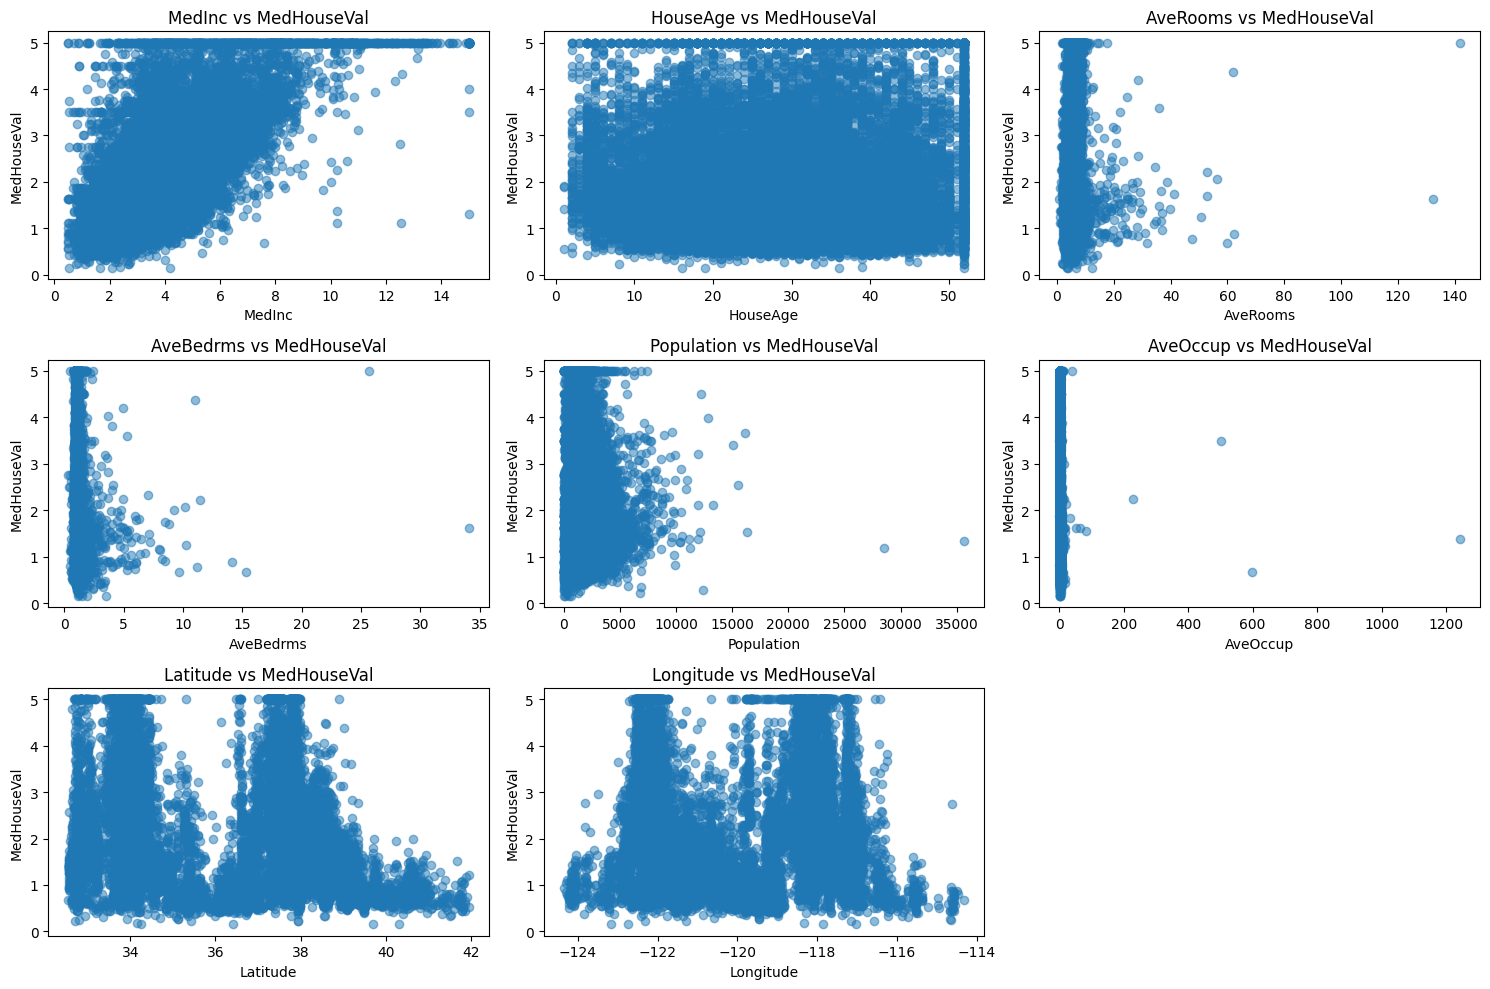

In [15]:
features = housing.feature_names
scatter_plot_features_vs_target(df, features, 'MedHouseVal')


## Explanation of the Scatter Plot
The image shows scatter plots of various features against MedHouseVal (median house value)

MedInc vs MedHouseVal:

Positive correlation: higher median income is associated with higher house values.

HouseAge vs MedHouseVal:

No clear pattern, though many house values are capped around 5. Suggests house age doesn't strongly affect house value.

AveRooms vs MedHouseVal:

Slight positive trend: more average rooms may relate to higher house value, though with high variance.

AveBedrms vs MedHouseVal:

Similar to AveRooms, but less clear trend; some outliers with high bedroom counts and low values.

Population vs MedHouseVal:

No clear relationship; most data clustered at low population values.

AveOccup vs MedHouseVal:

No clear pattern; a few extreme outliers with very high occupancy and low house value.

Latitude vs MedHouseVal:

Some geographical pattern; lower latitude (southern CA) tends to have higher values.

Longitude vs MedHouseVal:

Stronger pattern: western regions (closer to coast, around -122) generally have higher values.

Overall Insight:

Income and location (latitude/longitude) appear to be the most influential features on house value.

House age, population, and average occupancy show little correlation.

In [16]:
# ML Model Training

# Define X and y
X = df[housing.feature_names]
y = df['MedHouseVal']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
#  model evaluation

# Predict on test data
y_pred = model.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared: {r2:.4f}')


Root Mean Squared Error (RMSE): 0.7456
R-squared: 0.5758


## Explanation of Evaluation Metrics:
 Root Mean Squared Error (RMSE): 0.7456
RMSE measures the average error between the predicted and actual house values.

A value of 0.7456 means the model's predictions are, on average, off by about $74,560.

Lower RMSE = better performance.

 R-squared: 0.5758
R-squared (coefficient of determination) shows how well the model explains the variance in the target variable.

A value of 0.5758 means the model explains about 57.6% of the variation in house prices.

Higher R² = better model fit, with 1.0 being perfect.

Summary:
Your model performs reasonably well, explaining over half the variation in house prices, but there's still room for improvement (e.g., using more complex models like Random Forest or Gradient Boosting).

In [18]:
# new data input
new_data = pd.DataFrame({
    'MedInc': [8.3252],
    'HouseAge': [41.0],
    'AveRooms': [6.984127],
    'AveBedrms': [1.023810],
    'Population': [322.0],
    'AveOccup': [2.555556],
    'Latitude': [37.88],
    'Longitude': [-122.23]
})

# Predict median house value
predicted_value = model.predict(new_data)
print(f'Predicted Median House Value: {predicted_value[0]:.4f}')


Predicted Median House Value: 4.1519


## Explanation:
The value 4.1519 means the predicted median price is $415,190.

This prediction is based on the features provided (like median income, average rooms, house age, etc.).

The model has learned patterns from the California Housing dataset and uses those patterns to estimate what house prices should be for similar neighborhoods.

In summary:
$415,190 is the estimated median value for houses in an area with similar characteristics to the input data.

In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Collection and Loading ---
# TODO: Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `fetch_california_housing()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:

# Add your code here:


# --- Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:


# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:


# --- EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:


# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# Example: Use `plt.scatter()` to visualize the relationship between 'MedInc' and 'MedHouseVal'.

# Add your code here:


# TODO: Create a function to automate scatter plots for all features vs MedHouseVal.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:


# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Features: ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
# Target: 'MedHouseVal'

# Add your code here:


# --- ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:


# TODO: Choose an appropriate regression model.
# Hint: Use `LinearRegression()` from `sklearn.linear_model`.

# Define your regression model here:


# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:


# --- Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Predict on the test set and calculate the evaluation metrics:


# --- Model Prediction ---
# TODO: Predict Median House Value from a new set of feature inputs.
# Example new data: 'MedInc' = 3, 'HouseAge' = 30, 'AveRooms' = 6, 'AveOccup' = 3, 'Latitude' = 34, 'Longitude' = -118, 'AveBedrms' = 1, 'Population' = 1500
# Hint: Use `.predict()` on a new data array.

# Add your prediction code here:



